## Import Tool

In [1]:
from utils_elevation import *

## Define path to data

In [2]:
ann_path = "./99trainFeaturesWithElv.npy"
label_path = "./99trainLabel.npy"

## Run Tool

<IPython.core.display.Javascript object>


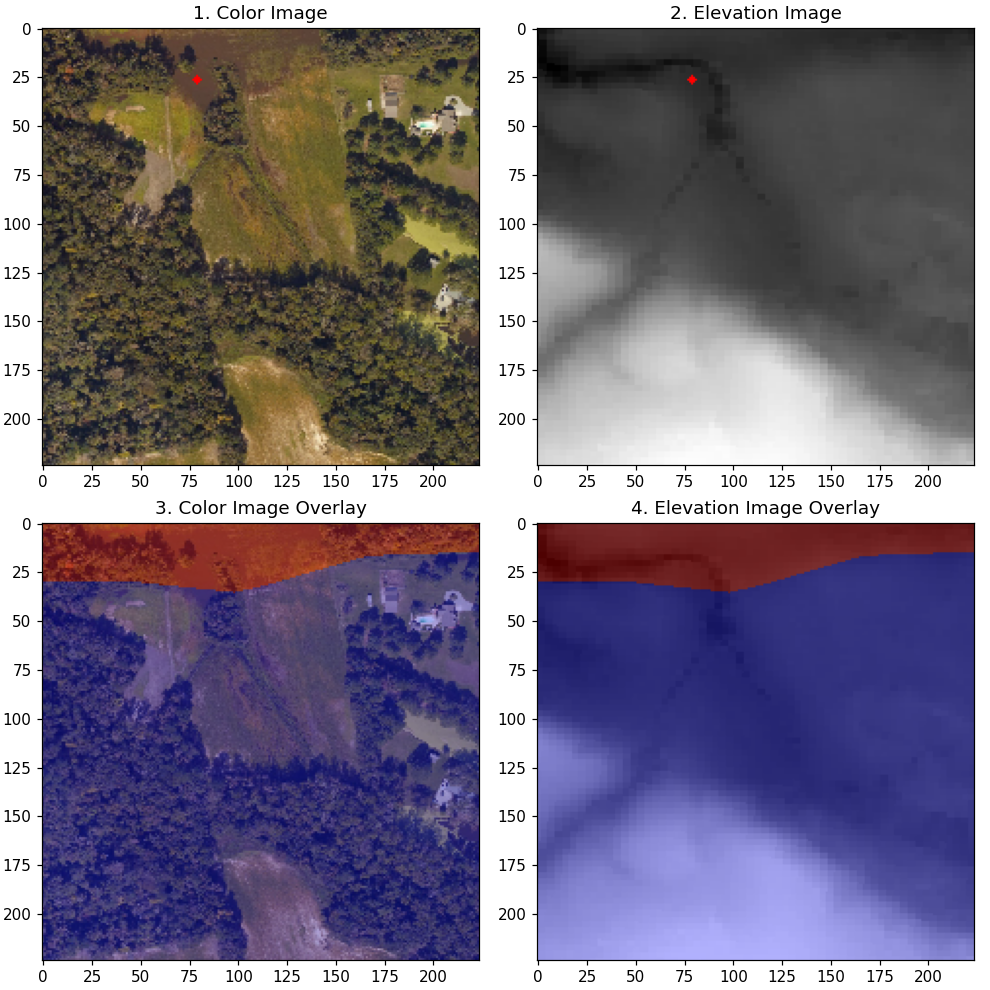

In [3]:
%matplotlib notebook
bs = bbox_select(ann_path, label_path)

### Run this cell to get currently selected coordinates

In [36]:
selected_points = bs.selected_points
print(selected_points)

[79.12935407081925, 26.965003352971905]


# Further Operations

# Cell 2

In [37]:
label = np.load(label_path)

In [52]:
label.shape

(224, 224, 1)

In [38]:
flood_labels = np.zeros((label.shape[0], label.shape[1], 1))

In [39]:
from collections import defaultdict

In [40]:
# round selected point to nearest integer
selected_point = (round(selected_points[0]), round(selected_points[1]))
i, j = selected_point

In [41]:
data = np.load(ann_path)
elevation_map = data[:,:,-1].astype('float')

In [42]:
elevation_map[i][j]

0.24250838160514832

In [43]:
height, width = elevation_map.shape

In [44]:
selected_point

(79, 27)

In [45]:
# get 8 neighboring pixels and their elevation
# flooded_pixels = []
bfs_queue = []
i, j = selected_point


# flooded_pixels.append((i,j))
bfs_queue.append(selected_point)

bfs_visited = defaultdict(lambda: defaultdict(bool))

bfs_visited[i][j] = True

In [46]:
nearby_points = []

while bfs_queue:
    (i, j) = bfs_queue.pop(0)
    bfs_visited[i][j] = True
    for l in [-1, 0, 1]:
        for r in [-1, 0, 1]:
            if (l == r == 0):
                continue

            i_nei, j_nei = (i+l, j+r) # get the neighboring i and j
            
            # check for boundary cases
            if i_nei < 0 or j_nei < 0 or i_nei >= width or j_nei >= height:
                continue
            
            # check if already visited or not
            if bfs_visited[i_nei][j_nei]:
                continue
            
            # check current pixel's elevation with neighbor's elevation
            if (elevation_map[i_nei][j_nei] <= elevation_map[i][j]) and (flood_labels[i_nei][j_nei] == 0):
                flood_labels[i_nei][j_nei] = 1
                bfs_queue.append((i_nei, j_nei))

In [47]:
bfs_queue

[]

# Cell 3

In [48]:
## Load annotation data
data = np.load(ann_path)

## Extract color image from data
color_image = data[:,:, :-1].astype('uint8')

## Extract elevaation data and convert to image
elevation_map = data[:,:, -1].astype('float')

# Normalize to 0 and 1
elevation_map = ( elevation_map - np.min(elevation_map)) / \
                       (np.max(elevation_map) - np.min(elevation_map) )

elevation_image = (elevation_map*255).astype("uint8")
elevation_image = cv2.cvtColor(elevation_image, cv2.COLOR_BGR2RGB)

## Extract land indices
land_idx = np.where(flood_labels == 0) 

## Extract flood indices
flood_idx = np.where(flood_labels == 1)

## Create combined map
combined_mask = np.zeros((flood_labels.shape[0], flood_labels.shape[1], 3))

combined_mask[land_idx[1], land_idx[0], 2] = 255
combined_mask[flood_idx[1], flood_idx[0], 0] = 255
combined_mask = combined_mask.astype("uint8")

## Overlay color mask        
color_image_overlay = cv2.addWeighted(color_image.copy(), 0.7, combined_mask.copy(), 0.3, 0.0)
elevation_image_overlay = cv2.addWeighted(elevation_image.copy(), 0.7, combined_mask.copy(), 0.3, 0.0)



In [49]:
color_image_overlay.shape, elevation_image_overlay.shape

((224, 224, 3), (224, 224, 3))

In [50]:
%matplotlib notebook

In [53]:
elevation_image_overlay.shape

(224, 224, 3)

<IPython.core.display.Javascript object>


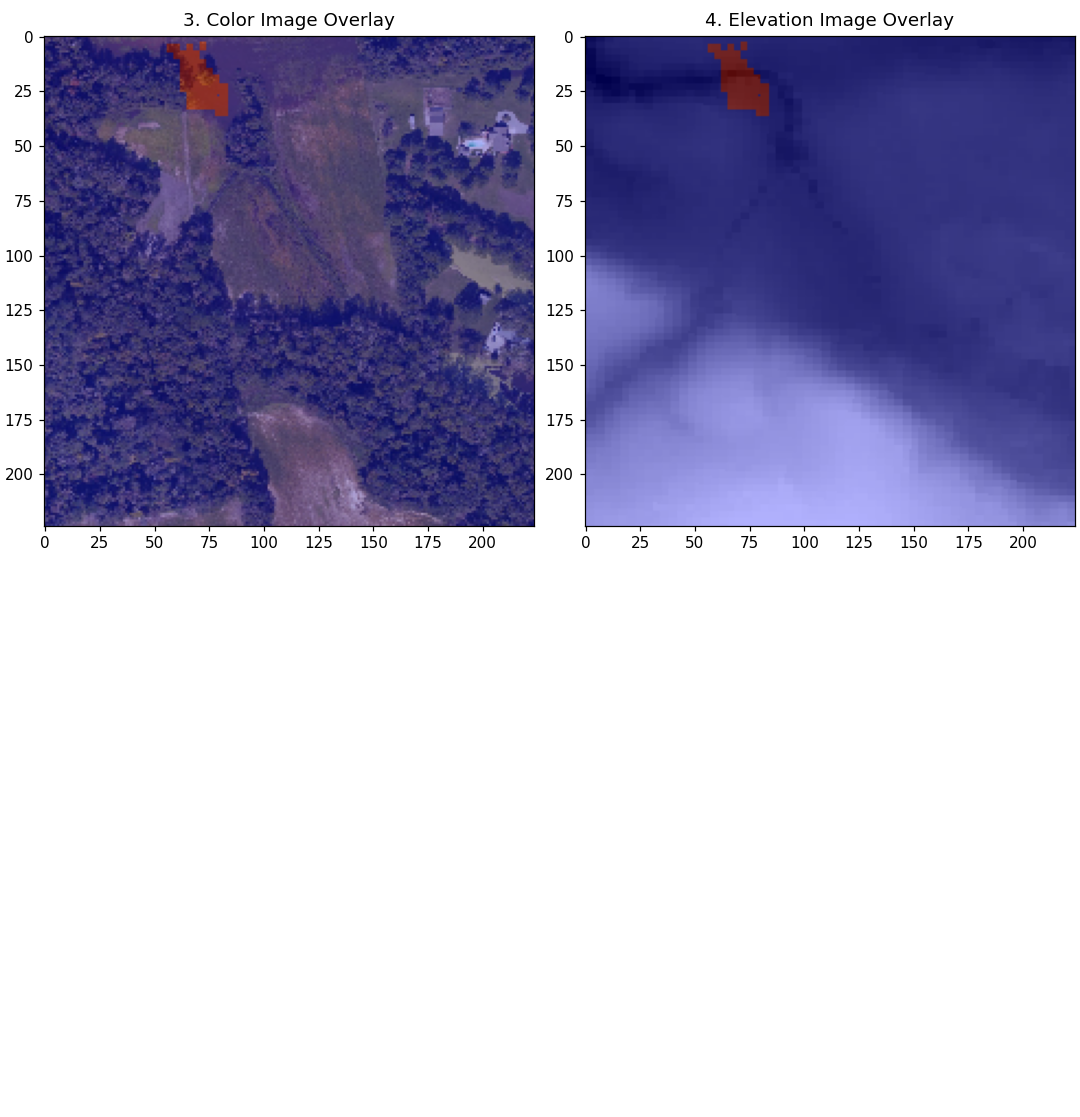

In [51]:
# Create new figure
bbox_figure = plt.figure(1, constrained_layout=True, figsize=(9, 9))

# Create a grid spec for figure
gs = bbox_figure.add_gridspec(2, 2)

# Create third subplot
bbox_figure_ax2 = bbox_figure.add_subplot(gs[0:1, 0:1])
bbox_figure_ax2.set_title('3. Color Image Overlay')
bbox_figure_ax2.imshow(color_image_overlay.copy(), cmap = 'gray')

# Create fourth subplot
bbox_figure_ax3 = bbox_figure.add_subplot(gs[0:1, 1:2])
bbox_figure_ax3.set_title('4. Elevation Image Overlay')
bbox_figure_ax3.imshow(elevation_image_overlay.copy(), cmap = 'gray')

# Cell 4

In [54]:
# Commit the results